# Scheduler

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from torchvision import datasets, models, transforms
import torch.optim as optim
import torch.nn as nn
from torchvision.transforms import *
from torch.utils.data import DataLoader
import torch
import numpy as np
from collections import namedtuple
import pandas as pd

def train(dataloader, model, criterion, optimizer, scheduler, num_epochs=20):
    results = []
    for epoch in range(num_epochs):
        optimizer.step()
        scheduler.step()
        model.train()

        running_loss = 0.0
        running_corrects = 0

        n = 0
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(True):
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                _, preds = torch.max(outputs, 1)

                loss.backward()
                optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
            n += len(labels)

        epoch_loss = running_loss / float(n)
        epoch_acc = running_corrects.double() / float(n)

        print(f'epoch {epoch}/{num_epochs} : {epoch_loss:.5f}, {epoch_acc:.5f}')
        results.append(EpochProgress(epoch, epoch_loss, epoch_acc.item()))
    return pd.DataFrame(results)

def plot_results(df, figsize=(10, 5)):
    fig, ax1 = plt.subplots(figsize=figsize)
    
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('loss', color='tab:red')
    ax1.plot(df['epoch'], df['loss'], color='tab:red')
    
    ax2 = ax1.twinx()
    ax2.set_ylabel('accuracy', color='tab:blue')
    ax2.plot(df['epoch'], df['accuracy'], color='tab:blue')
    
    fig.tight_layout()

np.random.seed(37)
torch.manual_seed(37)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

num_classes = 3
pretrained = True
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

EpochProgress = namedtuple('EpochProgress', 'epoch, loss, accuracy')

transform = transforms.Compose([Resize(224), ToTensor()])
image_folder = datasets.ImageFolder('./shapes/train', transform=transform)
dataloader = DataLoader(image_folder, batch_size=4, shuffle=True, num_workers=4)

## LambdaLR

epoch 0/20 : 3.67868, 0.30000
epoch 1/20 : 5.77002, 0.36667
epoch 2/20 : 3.08217, 0.30000
epoch 3/20 : 1.35805, 0.33333
epoch 4/20 : 1.17455, 0.40000
epoch 5/20 : 1.14226, 0.36667
epoch 6/20 : 1.08610, 0.46667
epoch 7/20 : 0.92153, 0.56667
epoch 8/20 : 1.09397, 0.36667
epoch 9/20 : 1.07448, 0.40000
epoch 10/20 : 1.00202, 0.46667
epoch 11/20 : 0.90226, 0.53333
epoch 12/20 : 0.91696, 0.56667
epoch 13/20 : 0.85464, 0.60000
epoch 14/20 : 0.83472, 0.60000
epoch 15/20 : 0.91903, 0.56667
epoch 16/20 : 1.10749, 0.36667
epoch 17/20 : 0.95354, 0.53333
epoch 18/20 : 0.88596, 0.56667
epoch 19/20 : 0.99027, 0.56667


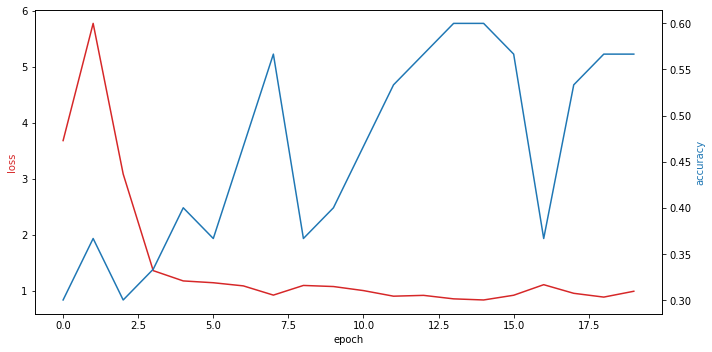

In [2]:
model = models.resnet18(pretrained=pretrained)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

params_to_update = model.parameters()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Rprop(params_to_update, lr=0.01)

scheduler = optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=[lambda epoch: 0.95 ** epoch])

results = train(dataloader, model, criterion, optimizer, scheduler)
plot_results(results)

## StepLR

epoch 0/20 : 0.44056, 0.83333
epoch 1/20 : 0.96433, 0.86667
epoch 2/20 : 0.74612, 0.83333
epoch 3/20 : 0.88412, 0.83333
epoch 4/20 : 0.33943, 0.86667
epoch 5/20 : 0.45692, 0.90000
epoch 6/20 : 0.65157, 0.80000
epoch 7/20 : 0.13915, 0.96667
epoch 8/20 : 0.89860, 0.86667
epoch 9/20 : 0.31498, 0.86667
epoch 10/20 : 0.00754, 1.00000
epoch 11/20 : 0.31943, 0.96667
epoch 12/20 : 1.08428, 0.90000
epoch 13/20 : 0.38481, 0.93333
epoch 14/20 : 0.15893, 0.93333
epoch 15/20 : 0.70501, 0.86667
epoch 16/20 : 0.00230, 1.00000
epoch 17/20 : 0.39456, 0.96667
epoch 18/20 : 0.58783, 0.93333
epoch 19/20 : 0.05343, 0.96667


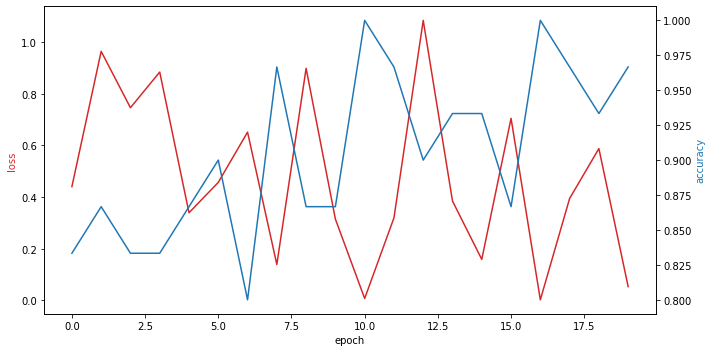

In [3]:
model = models.resnet18(pretrained=pretrained)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

params_to_update = model.parameters()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Rprop(params_to_update, lr=0.01)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1)

results = train(dataloader, model, criterion, optimizer, scheduler)
plot_results(results)

## MultiStepLR

epoch 0/20 : 2.92643, 0.40000
epoch 1/20 : 2.62325, 0.30000
epoch 2/20 : 1.51277, 0.30000
epoch 3/20 : 1.21783, 0.46667
epoch 4/20 : 0.74622, 0.70000
epoch 5/20 : 0.84713, 0.66667
epoch 6/20 : 0.61314, 0.76667
epoch 7/20 : 0.56660, 0.83333
epoch 8/20 : 0.71386, 0.80000
epoch 9/20 : 0.84546, 0.56667
epoch 10/20 : 0.50434, 0.80000
epoch 11/20 : 0.95564, 0.70000
epoch 12/20 : 0.56409, 0.73333
epoch 13/20 : 0.68842, 0.53333
epoch 14/20 : 0.59300, 0.76667
epoch 15/20 : 0.80058, 0.63333
epoch 16/20 : 0.63083, 0.63333
epoch 17/20 : 0.55677, 0.73333
epoch 18/20 : 0.53082, 0.73333
epoch 19/20 : 0.74327, 0.66667


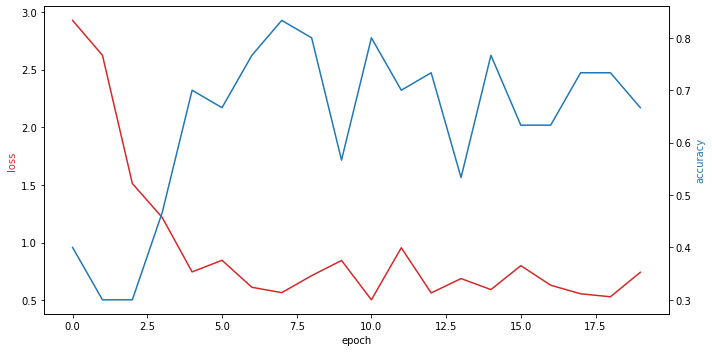

In [4]:
model = models.resnet18(pretrained=pretrained)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

params_to_update = model.parameters()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Rprop(params_to_update, lr=0.01)
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[5, 10, 15])

results = train(dataloader, model, criterion, optimizer, scheduler)
plot_results(results)

## ExponentialLR

epoch 0/20 : 0.93002, 0.60000
epoch 1/20 : 0.23017, 0.93333
epoch 2/20 : 0.19149, 0.93333
epoch 3/20 : 0.13276, 1.00000
epoch 4/20 : 0.07279, 1.00000
epoch 5/20 : 0.04754, 1.00000
epoch 6/20 : 0.16562, 0.90000
epoch 7/20 : 0.27136, 0.93333
epoch 8/20 : 0.09532, 0.96667
epoch 9/20 : 0.01662, 1.00000
epoch 10/20 : 0.07022, 0.96667
epoch 11/20 : 0.05122, 1.00000
epoch 12/20 : 0.11605, 0.96667
epoch 13/20 : 0.15131, 0.96667
epoch 14/20 : 0.11020, 0.96667
epoch 15/20 : 0.17183, 0.96667
epoch 16/20 : 0.10578, 0.93333
epoch 17/20 : 0.06153, 0.96667
epoch 18/20 : 0.16735, 0.93333
epoch 19/20 : 0.13174, 0.93333


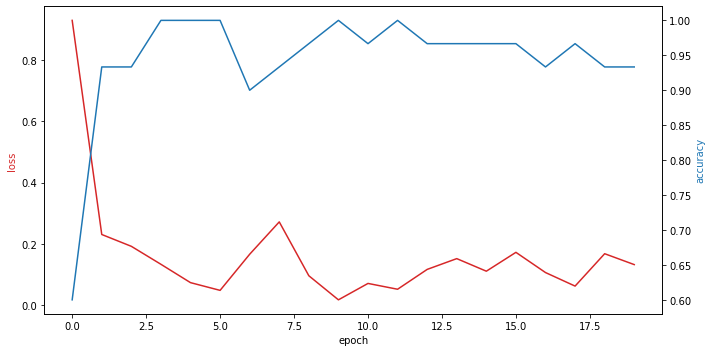

In [5]:
model = models.resnet18(pretrained=pretrained)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

params_to_update = model.parameters()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Rprop(params_to_update, lr=0.01)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.01)

results = train(dataloader, model, criterion, optimizer, scheduler)
plot_results(results)

## CyclicLR

epoch 0/20 : 1.70578, 0.40000
epoch 1/20 : 2.78385, 0.50000
epoch 2/20 : 6.21313, 0.40000
epoch 3/20 : 5.20730, 0.36667
epoch 4/20 : 3.87545, 0.30000
epoch 5/20 : 4.50556, 0.26667
epoch 6/20 : 5.30600, 0.46667
epoch 7/20 : 7.81145, 0.26667
epoch 8/20 : 2.87406, 0.36667
epoch 9/20 : 1.98654, 0.36667
epoch 10/20 : 2.19962, 0.63333
epoch 11/20 : 4.15721, 0.50000
epoch 12/20 : 1.67245, 0.50000
epoch 13/20 : 2.57373, 0.63333
epoch 14/20 : 2.63470, 0.40000
epoch 15/20 : 1.79878, 0.56667
epoch 16/20 : 1.93243, 0.66667
epoch 17/20 : 2.66169, 0.30000
epoch 18/20 : 2.53175, 0.66667
epoch 19/20 : 2.43702, 0.50000


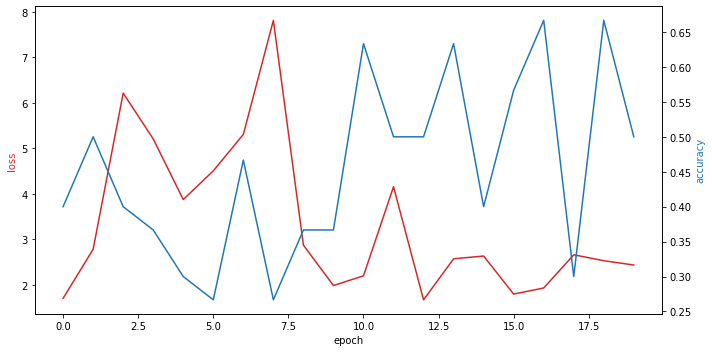

In [6]:
model = models.resnet18(pretrained=pretrained)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

params_to_update = model.parameters()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(params_to_update, lr=0.01)
scheduler = optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.01, max_lr=0.1)

results = train(dataloader, model, criterion, optimizer, scheduler)
plot_results(results)

## CosineAnnealingWarmRestarts

epoch 0/20 : 2.11921, 0.50000
epoch 1/20 : 3.61772, 0.40000
epoch 2/20 : 1.70618, 0.60000
epoch 3/20 : 2.14398, 0.36667
epoch 4/20 : 1.89068, 0.46667
epoch 5/20 : 0.93664, 0.56667
epoch 6/20 : 1.08518, 0.46667
epoch 7/20 : 1.07914, 0.60000
epoch 8/20 : 0.84737, 0.73333
epoch 9/20 : 0.97602, 0.66667
epoch 10/20 : 2.36544, 0.60000
epoch 11/20 : 4.99337, 0.53333
epoch 12/20 : 1.35459, 0.56667
epoch 13/20 : 1.39490, 0.70000
epoch 14/20 : 1.05934, 0.60000
epoch 15/20 : 0.89082, 0.73333
epoch 16/20 : 1.14092, 0.56667
epoch 17/20 : 5.52804, 0.66667
epoch 18/20 : 2.50833, 0.60000
epoch 19/20 : 3.58316, 0.63333


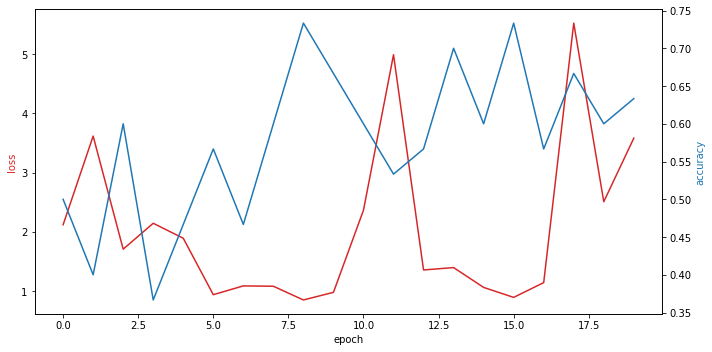

In [7]:
model = models.resnet18(pretrained=pretrained)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

params_to_update = model.parameters()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Rprop(params_to_update, lr=0.01)
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=5)

results = train(dataloader, model, criterion, optimizer, scheduler)
plot_results(results)